In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [0]:
columns = ['col1', 'col2', 'col3', 'y']
df = pd.read_csv('/content/clf.csv', names=columns, header=None)

In [3]:
display(df.head())

,col1,col2,col3,y
0,383,985.81,12.330032,9.0133
1,295,-1.00,19534.002429,1000.0000
2,57,-1.00,17797.319934,1000.0000
3,459,999.68,215.991636,982.0800
4,1808,990.40,1345.756447,987.2000


In [4]:
print(df.isnull().values.any())

False


In [5]:
df.y[df.y < 1000] = 0
df.y[df.y >= 1000] = 1
df.col2[df.col2 < 0] = 1000

df.y=df.y.astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [6]:
display(df.head())

,col1,col2,col3,y
0,383,985.81,12.330032,0
1,295,1000.00,19534.002429,1
2,57,1000.00,17797.319934,1
3,459,999.68,215.991636,0
4,1808,990.40,1345.756447,0


In [7]:
df['y'].value_counts()

1    44891
0    32035
Name: y, dtype: int64

In [8]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['y']==1]
#df_majority = majority.iloc[:, :-1]
df_minority = df[df['y']==0]
#df_minority = minority.iloc[:, :-1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=44891,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled['y'].value_counts()


1    44891
0    44891
Name: y, dtype: int64

In [9]:
df_upsampled

,col1,col2,col3,y
1,295,1000.00,19534.002429,1
2,57,1000.00,17797.319934,1
5,69,1000.00,2413.528564,1
6,100,1000.00,2168.891697,1
7,60,1000.00,11377.008751,1
...,...,...,...,...
65555,1716,1049.30,186.384274,0
52964,1038,1000.92,562.368867,0
12485,4499,1177.48,38.062725,0
48478,28458,1001.68,21330.405072,0


In [0]:
X= df.drop(['y'], axis=1)
Y= df['y']
X = np.array(X)
Y = np.array(Y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [0]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler1 = StandardScaler()

scaler1.fit(X_train)
X_train_standardized = scaler1.transform(X_train)
X_test_standardized = scaler1.transform(X_test)

scaler2 = Normalizer()

scaler2.fit(X_train)
X_train_normalized = scaler2.transform(X_train)
X_test_normalized = scaler2.transform(X_test)

In [13]:
pip install keras-metrics

In [0]:
from keras import models
from keras import layers
import keras_metrics
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(32, activation=None,input_shape=(3,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy',keras_metrics.precision(), keras_metrics.recall()])
history = model.fit(X_train_standardized, y_train, epochs=10,batch_size=32)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Epoch 1/10
61540/61540 [==============================] - 3s 47us/step - loss: 0.5459 - accuracy: 0.7021 - precision: 0.6946 - recall: 0.7970
Epoch 2/10
61540/61540 [==============================] - 3s 45us/step - loss: 0.4868 - accuracy: 0.7383 - precision: 0.8698 - recall: 0.6418
Epoch 3/10
61540/61540 [==============================] - 3s 45us/step - loss: 0.4728 - accuracy: 0.7477 - precision: 0.9070 - recall: 0.6307
Epoch 4/10
61540/61540 [==============================] - 3s 45us/step - loss: 0.4656 - accuracy: 0.7509 - precision: 0.9160 - recall: 0.6313
Epoch 5/10
61540/61540 [==============================] - 3s 44us/step - loss: 0.4623 - accuracy: 0.7507 - precision: 0.9164 - recall: 0.6314
Epoch 6/10
615

In [23]:
import sklearn
y_pred = model.predict(X_test_standardized)
print(sklearn.metrics.classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76      6445
           1       0.92      0.64      0.75      8941

    accuracy                           0.76     15386
   macro avg       0.79      0.78      0.76     15386
weighted avg       0.81      0.76      0.76     15386



In [24]:
TP = FP = TN = FN = 0
for pred, y in zip(y_pred, y_test):
    if y == 1:
        if pred == 1:
            TP = TP + 1
        else:
            FN = FN + 1
    else:
        if pred == 0:
            TN = TN + 1
        else:
            FP = FP + 1
print(f'True Positives = {TP}')
print(f'False Positives = {FP}')
print(f'True Negatives = {TN}')
print(f'False Negatives = {FN}')
print(f'Total = {len(y_test)}')


True Positives = 2706
False Positives = 6445
True Negatives = 0
False Negatives = 6235
Total = 15386


In [31]:
from sklearn.metrics import confusion_matrix
sklearn.metrics.confusion_matrix(y_test, y_pred.round())

array([[5976,  469],
       [3245, 5696]])

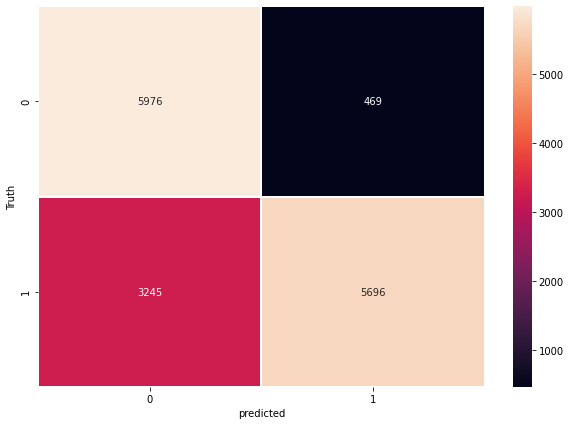

In [38]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn  as  sns

# Plot non-normalized confusion matrix
CM = confusion_matrix(y_test, y_pred.round())

plt.figure(figsize=(10,7))
sns.heatmap(CM,annot=True,linewidths=1, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [32]:
svc = SVC()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()


clfs = {'SVC' : svc}

def train_classifier(clf, X_train_standardized, y_train):    
    clf.fit(X_train_standardized, y_train)
def predict_labels(clf, X_test_standardized):
    return (clf.predict(X_test_standardized))
    

pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train_standardized, y_train)
    pred = predict_labels(v, X_test_standardized)
    pred_scores.append((k, accuracy_score(y_test,pred), precision_score(y_test,pred), recall_score(y_test,pred), f1_score(y_test,pred)))
scores_tfidf = pd.DataFrame(pred_scores, columns=['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
scores_tfidf

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,SVC,0.737944,0.909015,0.610111,0.730157


In [33]:
print(sklearn.metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75      6445
           1       0.91      0.61      0.73      8941

    accuracy                           0.74     15386
   macro avg       0.77      0.76      0.74     15386
weighted avg       0.79      0.74      0.74     15386



In [34]:
TP = FP = TN = FN = 0
for pred, y in zip(pred, y_test):
    if y == 1:
        if pred == 1:
            TP = TP + 1
        else:
            FN = FN + 1
    else:
        if pred == 0:
            TN = TN + 1
        else:
            FP = FP + 1
print(f'True Positives = {TP}')
print(f'False Positives = {FP}')
print(f'True Negatives = {TN}')
print(f'False Negatives = {FN}')
print(f'Total = {len(y_test)}')

True Positives = 5455
False Positives = 546
True Negatives = 5899
False Negatives = 3486
Total = 15386
